# Import libraries and data.

In [25]:
# import libraries
import pandas as pd
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_ollama.llms import OllamaLLM
from langchain.agents.agent_types import AgentType
from langchain_core.prompts import ChatPromptTemplate
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("student_habits_performance.csv")

In [8]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

# Setup agent.

In [3]:
agent = create_pandas_dataframe_agent(
    llm=OllamaLLM(model="llama3.2"),
    df=df, allow_dangerous_code=True)

# Prompts
For each prompt, I will code the solution before prompting the agent.

### Average Score for all students.

In [14]:
# manual code
df['exam_score'].mean()

np.float64(69.6015)

In [15]:
# prompt the agent
agent.invoke("what is the average score of all students?")

{'input': 'what is the average score of all students?',
 'output': "The average score of all students is approximately 69.60, as calculated from the 'exam_score' column of the dataframe."}

In [16]:
# We can also append ['output'] to return only the agent's response
agent.invoke("what is the average score of all students?")['output']

'The average score of all students is 69.6015.'

### Average score for all students studying more than 2 hours per day

In [17]:
# manual code
df[df['study_hours_per_day']>2]['exam_score'].mean()

np.float64(73.72056737588652)

In [18]:
# prompt the agent
agent.invoke("what is the average score of students who study more than 2 hours per day?")['output']

'The average score of students who study more than 2 hours per day is 73.72.'

### Impact of social media on test scores

In [ ]:
# manual code for pivot table view
pd.pivot_table(df, index='social_media_hours', values='exam_score', aggfunc='mean')

,exam_score
social_media_hours,
0.0,76.028571
0.1,67.966667
0.2,75.625000
0.3,75.550000
0.4,70.150000
0.5,81.533333
0.6,74.300000
0.7,72.880000
0.8,70.310000


In [ ]:
# manual code for correlation
df[['social_media_hours', 'exam_score']].corr()

,social_media_hours,exam_score
social_media_hours,1.000000,-0.166733
exam_score,-0.166733,1.000000


In [ ]:
# prompt the agent with vague question
agent.invoke("What is the affect of social media hours on exam scores?")['output']

"No, the correlation coefficient value for 'social_media_hours' and 'exam_score' is -0.166733, which suggests that as social media hours increase, exam scores tend to decrease."

'The scatter plot showing the correlation between social media hours and exam scores is Axes(0.125,0.11;0.775x0.77).'

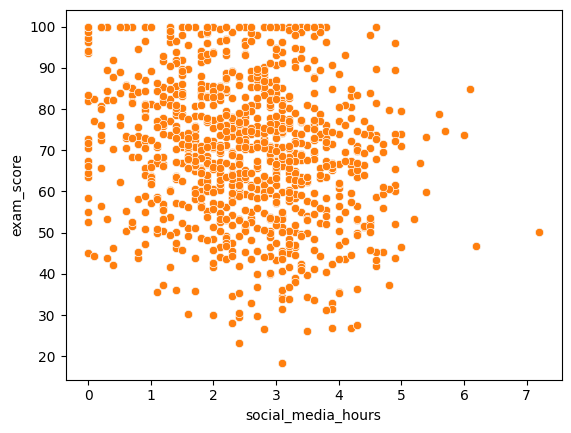

In [27]:
# ask for a chart
agent.invoke("create a chart showing the correlation between social media hours and exam scores. use seaborn for the visualization")['output']